In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
from nltk.corpus import stopwords

C:\Users\Sync\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sync\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Sync\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('sms_spam.csv')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3657,ham,R u here yet? I'm wearing blue shirt n black p...,NaN,NaN,NaN
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...,NaN,NaN,NaN
5442,ham,"I thought i'd get him a watch, just cos thats ...",NaN,NaN,NaN
291,ham,Haf u found him? I feel so stupid da v cam was...,NaN,NaN,NaN
1272,ham,Ok...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns as they contain almost no data
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
data.sample(5)

,v1,v2
3565,ham,Its ok..come to my home it vl nice to meet and...
3827,ham,Where are you ? What are you doing ? Are yuou ...
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...
263,spam,Hey I am really horny want to chat or see me n...
3336,ham,I AM AT THE GAS STATION. GO THERE.


In [8]:
#right now the names of columns in data are not very desciptive, so we can rename them for better understanding
data.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [9]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
#we have our tauniquet variable as a categorical (text) variable with 2 classes (spam and ham) and we want to perform the task of binary classification
#so we will encode the target variable as numbers

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['target'] = encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check for any missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
data.duplicated().sum()

403

In [15]:
#we need to remove the duplicate records / data
data = data.drop_duplicates(keep = 'first')

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(5169, 2)

In [18]:
#take a look at the class distribution (spam vs ham) in our dataset
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

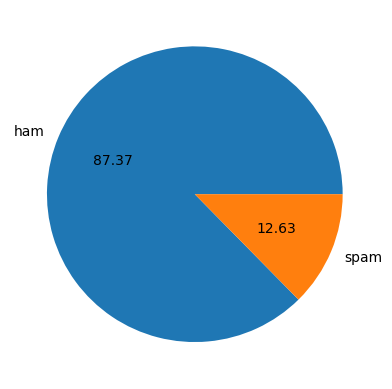

In [19]:
#visualize distribution using pie chart
plt.pie(data['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
#create a feature as the number of characters in a message
data['num_characters'] = data['text'].apply(len)

In [21]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#create a feature with the number / count of words in message - using nltk word tokenizer (it breaks the string into list of words)
data['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
#store this as new feature - number of words
data['num_words'] = data['text'].apply( lambda x : len(nltk.word_tokenize(x)) )

In [24]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#similar to word tokenizer in nltk, we can use sentence tokenizer (sent_tokenize) to create a list of sentences from text data
data['text'].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [26]:
#we can create a new feature as number of sentences in text
data['num_sentences'] = data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
#analyzing the stastics of newly created features to understand our text data better
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#considering the data in HAM messages seperately
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#considering the data in SPAM messages seperately
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

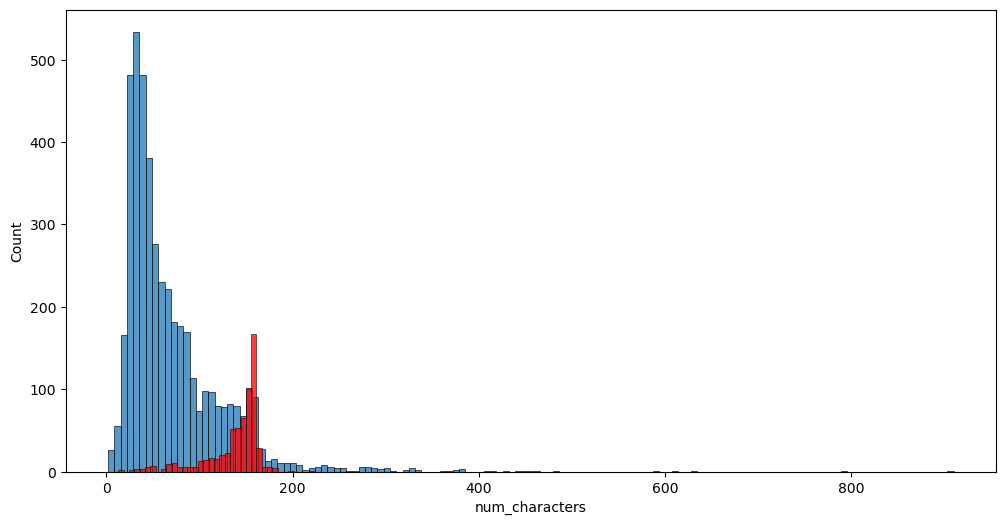

In [31]:
plt.figure(figsize = (12, 6))

#histogram for HAM messages
sns.histplot(data[data['target'] == 0]['num_characters'])

#histogram for SPAM messages
sns.histplot(data[data['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

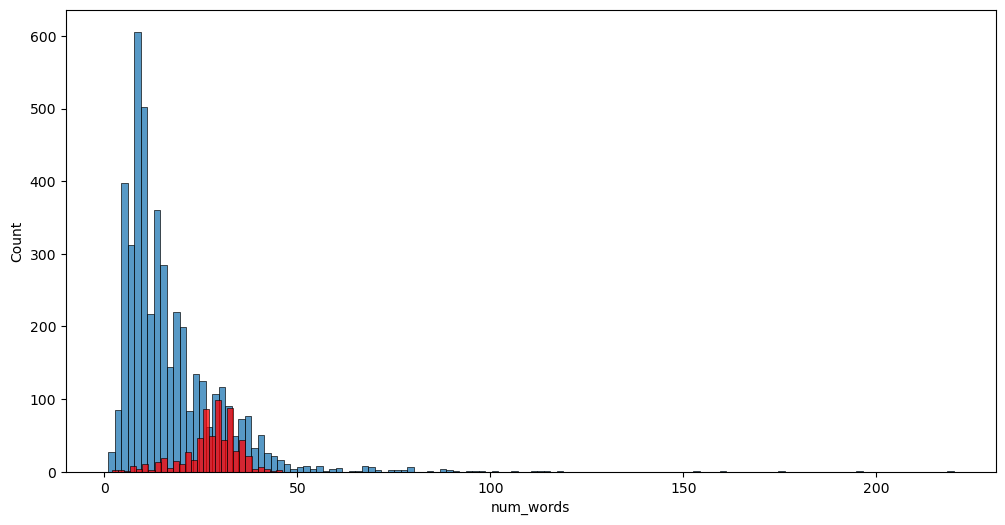

In [32]:

plt.figure(figsize = (12, 6))

#histogram for HAM messages
sns.histplot(data[data['target'] == 0]['num_words'])

#histogram for SPAM messages
sns.histplot(data[data['target'] == 1]['num_words'], color = 'red')

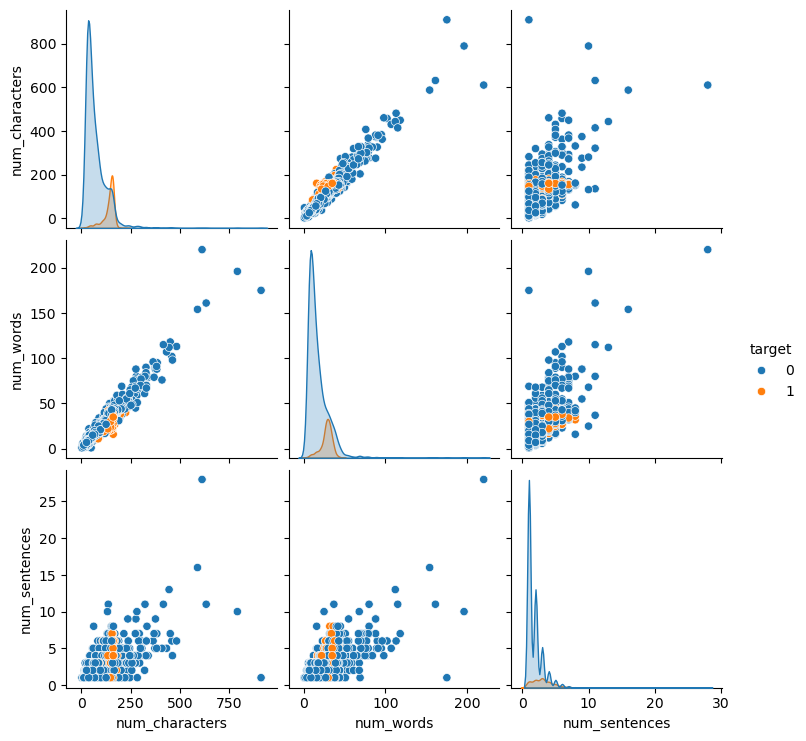

In [33]:
sns.pairplot(data, hue = 'target')

<AxesSubplot:>

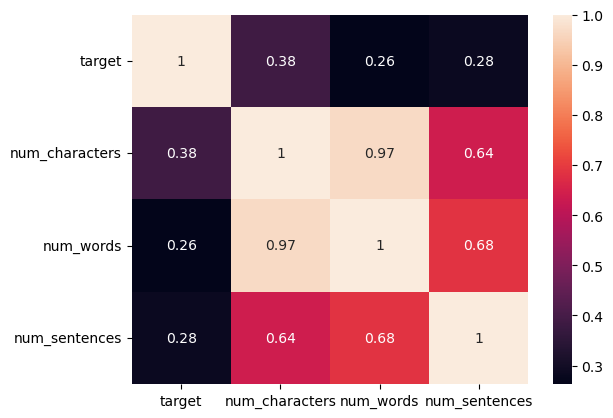

In [34]:
sns.heatmap(data[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

In [35]:
from nltk.stem.porter import PorterStemmer

#function to perform all the preprocessing steps on text data
def transform_text(text):
    #convert text into lower case
    text = text.lower()
    
    #create word tokens from text string
    text = nltk.word_tokenize(text)
    
    #removing special characters and punctuations
    res1 = []
    for word in text:
        if word.isalnum():
            res1.append(word)
            
    #removing stop words
    res2 = []
    for word in res1:
        if word not in stopwords.words('english'):
            res2.append(word)
    
    #stemming - extracting base words 
    ps = PorterStemmer()
    
    res3 = []
    for word in res2:
        res3.append(ps.stem(word))
    
    #convert the word list back to string
    text = " ".join(res3)
    
    return text

In [36]:
#example usage
transform_text("Hello, My name is Aaditya Bansal and I like drawing. #artistlife 100% !! @adiaturb, How are you?")

'hello name aaditya bansal like draw artistlif 100 adiaturb'

In [37]:

data['transformed_text'] = data['text'].apply(transform_text)

In [38]:

data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:

#create a list of words in SPAM messages
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)


9939

In [41]:
from collections import Counter

In [42]:
#extract the top 30 words
#counter creates a dictonary of words with there counts available
top_spam_word_count = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['word', 'count'])

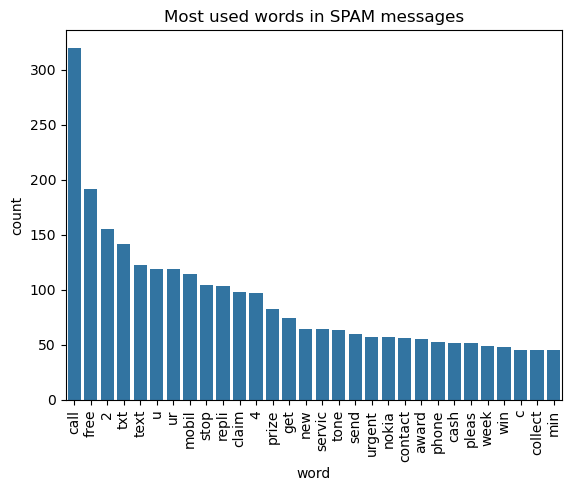

In [43]:
sns.barplot(data = top_spam_word_count, x = 'word', y = 'count')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in SPAM messages')
plt.show()

In [44]:
#create a list of words in SPAM messages
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35394

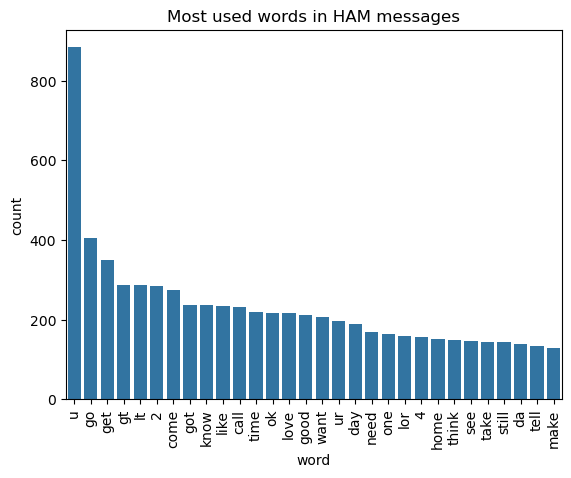

In [46]:
#extract the top 30 words
#counter creates a dictonary of words with there counts available
top_ham_word_count = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['word', 'count'])

sns.barplot(data = top_ham_word_count, x = 'word', y = 'count')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in HAM messages')
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

#converting sparse array returned after transformation into dense array
X = cv.fit_transform(data['transformed_text']).toarray()

X.shape

(5169, 6708)

In [48]:
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(data['transformed_text']).toarray()

X.shape

(5169, 3000)

In [49]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
y.shape

(5169,)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [53]:
#defining instances of differnent Naive Bayes Model Classes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
def print_result(y_actual, y_predicted):
    print("Accuracy Score : ")
    print(accuracy_score(y_actual, y_predicted))
    print()
    
    print("Confusion Matrix : ")
    print(confusion_matrix(y_actual, y_predicted))
    print()
    
    print("Precision Score : ")
    print(precision_score(y_actual, y_predicted))
    print()
    
    print("Recall Score : ")
    print(recall_score(y_actual, y_predicted))
    print()
    
    print("F1 Score : ")
    print(f1_score(y_actual, y_predicted))
    print()

In [55]:
#Gausian Naive Bayes

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print_result(y_test, y_pred_gnb)

Accuracy Score : 
0.8694390715667312

Confusion Matrix : 
[[788 108]
 [ 27 111]]

Precision Score : 
0.5068493150684932

Recall Score : 
0.8043478260869565

F1 Score : 
0.6218487394957983



In [56]:
#Multinomial Naive Bayes

mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print_result(y_test, y_pred_mnb)

Accuracy Score : 
0.9709864603481625

Confusion Matrix : 
[[896   0]
 [ 30 108]]

Precision Score : 
1.0

Recall Score : 
0.782608695652174

F1 Score : 
0.878048780487805



In [57]:
#Bernoulli Naive Bayes

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print_result(y_test, y_pred_bnb)

Accuracy Score : 
0.9835589941972921

Confusion Matrix : 
[[895   1]
 [ 16 122]]

Precision Score : 
0.991869918699187

Recall Score : 
0.8840579710144928

F1 Score : 
0.9348659003831418



In [72]:
from sklearn.svm import SVC

svc = SVC(kernel = 'sigmoid')
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
classifiers = {
    'SVC' : svc,
    'Multinomial Naive Bayes' : mnb,
    'Bernoulli Naive Bayes' : bnb
}

In [74]:
#function to train the classifier and return the evaluation metrics (accuracy, precision, recall, f1-score)
def train_classifier(clf, X_train, y_train, X_test, y_test):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [75]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354,
 0.9747899159663865,
 0.8405797101449275,
 0.9027237354085604)

In [76]:
classifier_models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in classifiers.items():
    
    accuracy, precision, recall, f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    classifier_models.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [77]:
evaluation_scores = pd.DataFrame(classifier_models, columns = ['Classifier'])
evaluation_scores['Accuracy'] = accuracy_scores
evaluation_scores['Precision'] = precision_scores
evaluation_scores['Recall'] = recall_scores
evaluation_scores['F1 Score'] = f1_scores

In [78]:
evaluation_scores.sort_values('F1 Score', ascending = False)

,Classifier,Accuracy,Precision,Recall,F1 Score
2,Bernoulli Naive Bayes,0.983559,0.99187,0.884058,0.934866
0,SVC,0.975822,0.97479,0.840580,0.902724
1,Multinomial Naive Bayes,0.970986,1.00000,0.782609,0.878049


In [79]:
data['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [80]:
X_exp = np.hstack((X, data['num_characters'].to_numpy().reshape(-1, 1)))

X_exp

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [85]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y, test_size = 0.2, random_state = 2)


results = []
for name, clf in classifiers.items():
    
    accuracy, precision, recall, f1 = train_classifier(clf, X_train_exp, y_train_exp, X_test_exp, y_test_exp)
    results.append([name, accuracy, precision, recall, f1])
    
    print("For Classifier : ", name)
    print("Accuracy : ", accuracy)
    print("Precision : ", precision)
    print("Recall : ", recall)
    print("F1 Score : ", f1)
    print()

For Classifier :  SVC
Accuracy :  0.7775628626692457
Precision :  0.057692307692307696
Recall :  0.043478260869565216
F1 Score :  0.049586776859504134

For Classifier :  Multinomial Naive Bayes
Accuracy :  0.9410058027079303
Precision :  1.0
Recall :  0.5579710144927537
F1 Score :  0.7162790697674419

For Classifier :  Bernoulli Naive Bayes
Accuracy :  0.9835589941972921
Precision :  0.991869918699187
Recall :  0.8840579710144928
F1 Score :  0.9348659003831418



C:\Users\Sync\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


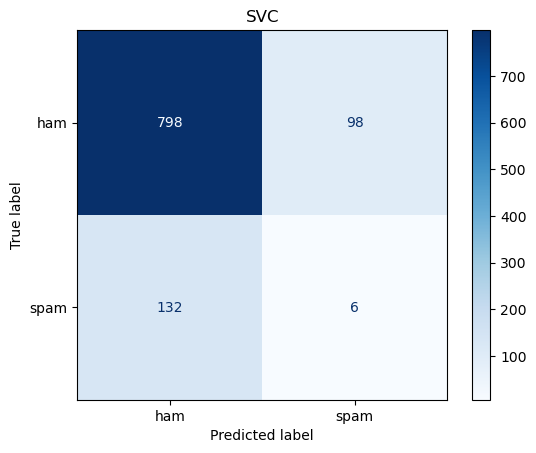

C:\Users\Sync\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


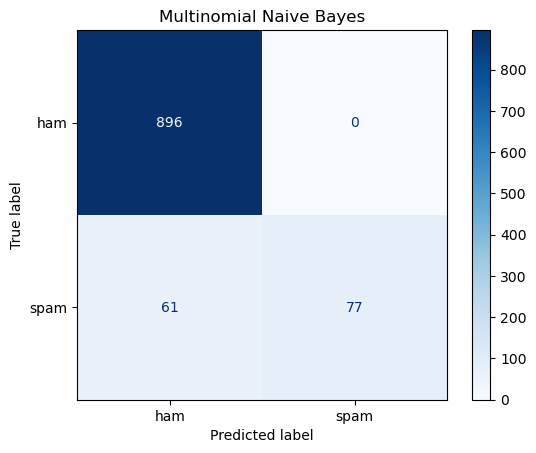

C:\Users\Sync\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


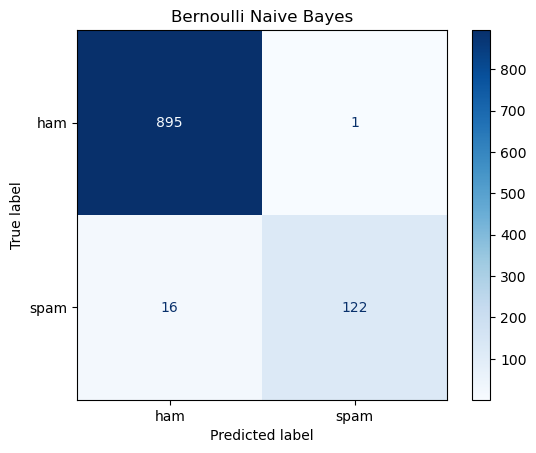

In [87]:
from sklearn.metrics import plot_confusion_matrix

for name, clf in classifiers.items():
    clf.fit(X_train_exp, y_train_exp)
    disp = plot_confusion_matrix(clf, X_test_exp, y_test_exp, display_labels=['ham', 'spam'], cmap=plt.cm.Blues, normalize=None)
    disp.ax_.set_title(name)
    plt.show()